<a href="https://colab.research.google.com/github/carlosgalan01/Neural-Networks/blob/main/My_artificial_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [ ]:
import numpy as np, pandas as pd, tensorflow as tf, json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

In [ ]:
print("TensorFlow:", tf.__version__)

TensorFlow: 2.19.0


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

## Part 1 - Data Preprocessing

### Importing the dataset

In [ ]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values   # [CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary]
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [ ]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [ ]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [ ]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), [1])],
    remainder='passthrough'
)
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [ ]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [ ]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

### Training the ANN on the Training set

In [ ]:
history = ann.fit(X_train, y_train,
                  batch_size=32,
                  epochs=200,
                  validation_split=0.2,   # 20% de X_train para val
                  callbacks=[es],
                  verbose=1)

Epoch 1/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6382 - auc: 0.5554 - loss: 0.6361 - val_accuracy: 0.8050 - val_auc: 0.6990 - val_loss: 0.4633
Epoch 2/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7974 - auc: 0.6938 - loss: 0.4743 - val_accuracy: 0.8244 - val_auc: 0.7454 - val_loss: 0.4325
Epoch 3/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8090 - auc: 0.7382 - loss: 0.4517 - val_accuracy: 0.8313 - val_auc: 0.7600 - val_loss: 0.4222
Epoch 4/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8139 - auc: 0.7497 - loss: 0.4440 - val_accuracy: 0.8325 - val_auc: 0.7698 - val_loss: 0.4161
Epoch 5/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8134 - auc: 0.7630 - loss: 0.4346 - val_accuracy: 0.8413 - val_auc: 0.7770 - val_loss: 0.4103
Epoch 6/200
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8145 - auc: 0.7660 - loss: 0.4326 - val_accuracy: 0.8438 - val_auc: 0.7853 - val_loss: 0.4049
Epoch 7/200
200/200 ━━━━━━━━━━━━━━

In [ ]:
import matplotlib.pyplot as plt

hist = history.history

In [ ]:
best_epoch = int(np.argmin(hist["val_loss"]))
print(f"Mejor época (mínima val_loss): {best_epoch}")

# Resumen en la mejor época
def safe_get(key, epoch):
    return hist[key][epoch] if key in hist else None

summary = {
    "loss": safe_get("loss", best_epoch),
    "val_loss": safe_get("val_loss", best_epoch),
    "accuracy": safe_get("accuracy", best_epoch),
    "val_accuracy": safe_get("val_accuracy", best_epoch),
    "auc": safe_get("auc", best_epoch),
    "val_auc": safe_get("val_auc", best_epoch),
}
print("Métricas en la mejor época:", {k: (None if v is None else round(float(v), 4)) for k, v in summary.items()})


Mejor época (mínima val_loss): 40
Métricas en la mejor época: {'loss': 0.3524, 'val_loss': 0.3257, 'accuracy': 0.8516, 'val_accuracy': 0.88, 'auc': 0.853, 'val_auc': 0.8667}


In [ ]:
test_loss, test_acc, test_auc = ann.evaluate(X_test, y_test, verbose=0)
print(f"TEST -> loss: {test_loss:.3f} | acc: {test_acc:.3f} | auc: {test_auc:.3f}")

TEST -> loss: 0.339 | acc: 0.859 | auc: 0.861


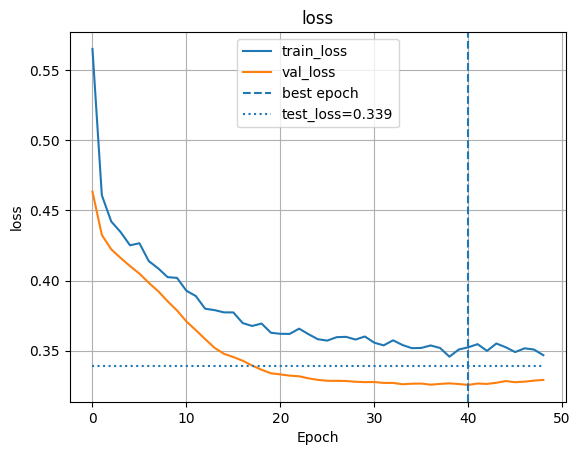

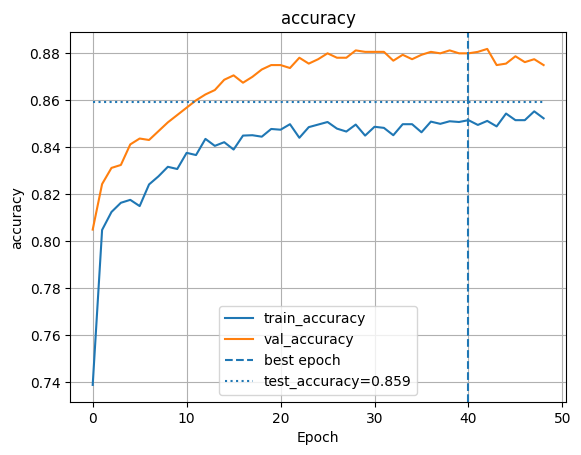

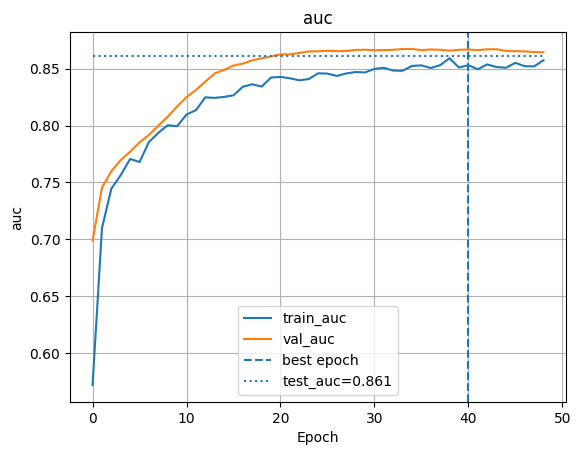

In [ ]:
for m in ["loss", "accuracy", "auc"]:
    if m in hist and ("val_"+m) in hist:
        plt.figure()
        plt.plot(hist[m], label=f"train_{m}")
        plt.plot(hist["val_"+m], label=f"val_{m}")
        # Línea vertical en la mejor época (mínima val_loss)
        plt.axvline(best_epoch, ls="--", label="best epoch")
        # Línea horizontal con el valor de test
        test_value = {"loss": test_loss, "accuracy": test_acc, "auc": test_auc}[m]
        plt.hlines(test_value, xmin=0, xmax=len(history.history[m])-1, linestyles=":", label=f"test_{m}={test_value:.3f}")
        plt.title(m)
        plt.xlabel("Epoch")
        plt.ylabel(m)
        plt.grid(True)
        plt.legend()
        plt.show()

In [ ]:
ann.save('model.keras')
with open('historial_entrenamiento.json', 'w') as f:
    json.dump({k: [float(v) for v in vals] for k, vals in history.history.items()}, f, indent=2)

## Part 4 - Making the predictions and evaluating the model

### Predicting the result of a single observation

**Homework**

Use our ANN model to predict if the customer with the following informations will leave the bank:

Geography: France

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

So, should we say goodbye to that customer?

**Solution**

In [ ]:
import numpy as np

def predict_single(geography, credit_score, gender, age, tenure, balance, n_products, has_card, is_active, salary):
    # orden exacto de columnas originales (X antes de ct): CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary
    row = np.array([[credit_score, geography, gender, age, tenure, balance, n_products, has_card, is_active, salary]], dtype=object)
    # mismo LabelEncoder para género
    row[:, 2] = le.transform(row[:, 2])
    # mismo OneHot para geografía
    row = ct.transform(row)
    # mismo escalado
    row = sc.transform(row)
    # predicción
    p = float(ann.predict(row)[0][0])
    return p, int(p > 0.5)

p, c = predict_single("France", 600, "Male", 40, 3, 60000.0, 2, 1, 1, 50000.0)
print(f"Probabilidad clase 1: {p:.4f} | Predicción (0/1): {c}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Probabilidad clase 1: 0.0433 | Predicción (0/1): 0


Therefore, our ANN model predicts that this customer stays in the bank!

**Important note 1:** Notice that the values of the features were all input in a double pair of square brackets. That's because the "predict" method always expects a 2D array as the format of its inputs. And putting our values into a double pair of square brackets makes the input exactly a 2D array.

**Important note 2:** Notice also that the "France" country was not input as a string in the last column but as "1, 0, 0" in the first three columns. That's because of course the predict method expects the one-hot-encoded values of the state, and as we see in the first row of the matrix of features X, "France" was encoded as "1, 0, 0". And be careful to include these values in the first three columns, because the dummy variables are always created in the first columns.

### Predicting the Test set results

In [ ]:
y_proba = ann.predict(X_test)
y_pred  = (y_proba > 0.5).astype(int)

cm   = confusion_matrix(y_test, y_pred)
acc  = accuracy_score(y_test, y_pred)
auc  = roc_auc_score(y_test, y_proba)

print("Confusion matrix:\n", cm)
print(f"Accuracy: {acc:.3f} | ROC-AUC: {auc:.3f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Confusion matrix:
 [[1547   46]
 [ 235  172]]
Accuracy: 0.860 | ROC-AUC: 0.861


### Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1510   85]
 [ 191  214]]


0.862